In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 

In [3]:
wdata = pd.read_csv('./BlackFriday.csv')

In [4]:
wdata.shape

(537577, 12)

In [5]:
wdata.User_ID.unique().shape

(5891,)

In [6]:
wdata.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
wdata.apply(lambda x: x.count(), axis =0) -537577

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2           -166986
Product_Category_3           -373299
Purchase                           0
dtype: int64

In [8]:
wdata.apply(lambda x: len(x.unique()), axis =0)

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

#### Question 1: What is the most profitable product/ category among all the data? 

In [9]:
#wdata[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].fillna(-99).groupby\
#(['Product_Category_1','Product_Category_2','Product_Category_3']).agg({'Purchase':'sum'})

In [10]:
## visualization using nightingale rose plot

In [11]:
## first we calculate the trace1 length, which will be the proportion of the purchase amount($) each category contribute 

In [12]:
lst_cat_1_perc = wdata[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum() / np.sum(wdata[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum())

In [13]:
nightingale_trace_1_r = [x*100 for x in lst_cat_1_perc.values]
nightingale_trace_1_text = [str(x) for x in lst_cat_1_perc.index]
nightingale_trace_1_name = "Only main category"

In [14]:
lst_cat_2_perc = wdata[['Product_Category_1','Product_Category_2','Purchase']].groupby(['Product_Category_1','Product_Category_2']).sum() \
/ np.sum(wdata[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum())

In [15]:
lst_cat_2_perc = lst_cat_2_perc.groupby('Product_Category_1').sum()

In [16]:
nightingale_trace_2_r = [x*100 for x in lst_cat_2_perc.values]
nightingale_trace_2_text = [str(x) for x in lst_cat_2_perc.index]
nightingale_trace_2_name = "Has secondary category"

In [17]:
lst_cat_3_perc = wdata[['Product_Category_1','Product_Category_2','Product_Category_3','Purchase']].groupby(['Product_Category_1','Product_Category_2','Product_Category_3']).sum() / np.sum(wdata[['Product_Category_1','Purchase']].groupby('Product_Category_1').sum())  

In [18]:
lst_cat_3_perc = lst_cat_3_perc.groupby('Product_Category_1').sum()

In [19]:
nightingale_trace_3_r = [x*100 for x in lst_cat_3_perc.values]
nightingale_trace_3_text = [str(x) for x in lst_cat_3_perc.index]
nightingale_trace_3_name = "Has secondary and third categories"

In [20]:
lst_cat_1_perc['category'] = lst_cat_1_perc.index
lst_cat_2_perc['category'] = lst_cat_2_perc.index
lst_cat_3_perc['category'] = lst_cat_3_perc.index

In [21]:
perc_tbl = lst_cat_1_perc.merge(lst_cat_2_perc, left_on= 'category' , right_on = "category", how = "outer").merge(lst_cat_3_perc, left_on= 'category' , right_on = "category", how = "outer")

In [22]:
perc_tbl.columns =['Main','category','Secondary','Third']

In [23]:
perc_tbl

,Main,category,Secondary,Third
0,0.375207,1,0.358276,0.246488
1,0.052713,2,0.050525,0.035920
2,0.039941,3,0.039395,0.024920
3,0.005369,4,0.005310,0.002627
4,0.184731,5,0.108375,0.023789
5,0.063646,6,0.060813,0.025864
6,0.011970,7,0.000874,NaN
7,0.167547,8,0.077976,0.013497
8,0.001251,9,0.001247,NaN
9,0.019736,10,0.017925,0.006404


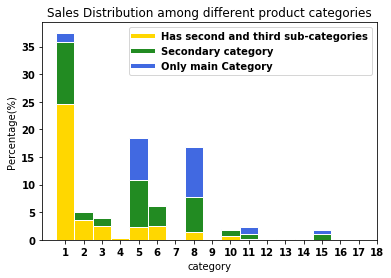

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import rc
 
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars1 = perc_tbl.Third * 100
bars2 = (perc_tbl.Secondary - perc_tbl.Third) * 100
bars3 = (perc_tbl.Main - perc_tbl.Secondary) * 100
 
# Heights of bars1 + bars2 (TO DO better)
bars = bars1 + bars2
 
# The position of the bars on the x-axis
r = perc_tbl.category
 
# Names of group and bar width
names = perc_tbl.category
barWidth = 1
 
# Create brown bars
plt.bar(r, bars1, color='gold', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars2, bottom=bars1, color='forestgreen', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, bars3, bottom=bars, color='royalblue', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("category")

#Custom legend

legend_elements = [Line2D([0], [0], color='gold', lw=4, label='Has second and third sub-categories'),
                   Line2D([0], [0], color='forestgreen', lw=4, label='Secondary category'),
                   Line2D([0], [0], color='royalblue', lw=4, label='Only main Category')]

plt.legend(handles=legend_elements, loc='upper right')
plt.ylabel('Percentage(%)')
plt.title('Sales Distribution among different product categories')
# Show graphic
#plt.show()
plt.savefig('sales_distribution.png')

In [25]:
#product 

In [26]:
top_25_sales = wdata.groupby('Product_ID').agg({'Purchase':'sum', 'Product_Category_1':'max'}).sort_values(by='Purchase', ascending = False).head(25)
top_25_sales = top_25_sales.reset_index()

In [27]:
top_25_sales['col'] = top_25_sales.Product_Category_1.apply(lambda x: 'tomato' if x==1 else 'black')

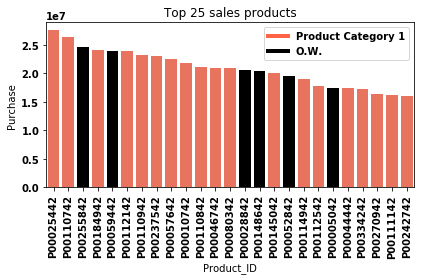

In [28]:

out = sns.barplot(x = 'Product_ID', y='Purchase', palette = top_25_sales.col,data = top_25_sales)

legend_elements = [Line2D([0], [0], color='Tomato', lw=4, label='Product Category 1'),
                   Line2D([0], [0], color='Black', lw=4, label='O.W.')]

plt.legend(handles=legend_elements, loc='upper right')
plt.title('Top 25 sales products')
out.set_xticklabels(labels = top_25_sales.Product_ID,rotation=90)
plt.tight_layout()
plt.savefig('sales_top25.png')

In [29]:
top_25_sales['Percentage'] = top_25_sales.Purchase / wdata.Purchase.sum() *100

In [30]:
# percentage cat 1 contributed
wdata[wdata.Product_Category_1 == 1].agg({'Purchase':'sum'}) / wdata.Purchase.sum() *100

Purchase    37.52074
dtype: float64

#### Question 2: What is the targeted customer (profile: Gender/Age/Occupation/...)if the retailer were to make more profit (sell more products to the largest share of customers / smallest share of customer)? 

In [31]:
wdata.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [32]:
##purchase amount

In [33]:
age_gender_crosstab = pd.crosstab(wdata.Gender, wdata.Age, values = wdata.Purchase, aggfunc= np.sum, margins= True).apply(lambda x: x*100 / wdata.Purchase.sum())

In [34]:
age_gender_crosstab

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,0.833587,4.029948,8.646599,4.763377,2.287855,1.753253,0.895842,23.210462
M,1.810251,13.939937,31.207551,15.378439,5.951394,5.459427,3.042538,76.789538
All,2.643838,17.969886,39.854150,20.141817,8.239250,7.212680,3.938380,100.000000


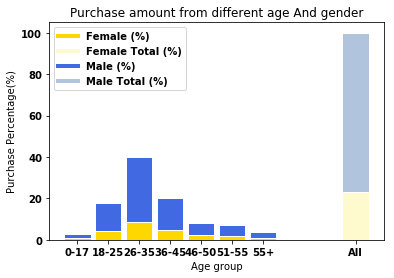

In [35]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars_male = age_gender_crosstab.iloc[0].values
bars_female = age_gender_crosstab.iloc[1].values
bars_tot = age_gender_crosstab.iloc[2].values
 
# The position of the bars on the x-axis
num_category = len(age_gender_crosstab.iloc[0].index)
r = [x*2 for x in range(num_category-1)] + [2*(num_category +1)]

# Names of group and bar width
names = age_gender_crosstab.iloc[0].index
barWidth = 1.7
 
# Create brown bars
plt.bar(r, bars_male, 
        color=['gold']*(num_category-1) + ['lemonchiffon'], 
        edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars_female, bottom=bars_male, 
        color=['royalblue']*(num_category-1) + ['lightsteelblue'], 
        edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Age group")
plt.ylabel("Purchase Percentage(%)")
plt.title("Purchase amount from different age And gender")

#Custom legend

legend_elements = [Line2D([0], [0], color='gold', lw=4, label='Female (%)'),
                   Line2D([0], [0], color='lemonchiffon', lw=4, label='Female Total (%)'),
                   Line2D([0], [0], color='royalblue', lw=4, label='Male (%)'),
                   Line2D([0], [0], color='lightsteelblue', lw=4, label='Male Total (%)')]

plt.legend(handles=legend_elements, loc='upper left')

# Show graphic
plt.savefig('sales_age_gender.png')
plt.show()


In [36]:
##purchase count

In [37]:
age_gender_num_crosstab = pd.crosstab(wdata.Gender, wdata.Age, margins= True) *100 / wdata.shape[0]

In [38]:
age_gender_num_crosstab

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Gender,,,,,,,,
F,0.921356,4.475080,9.179708,4.914645,2.391471,1.792115,0.916892,24.591268
M,1.814438,13.686783,30.756896,15.082304,5.891249,5.205580,2.971481,75.408732
All,2.735794,18.161863,39.936604,19.996949,8.282720,6.997695,3.888373,100.000000


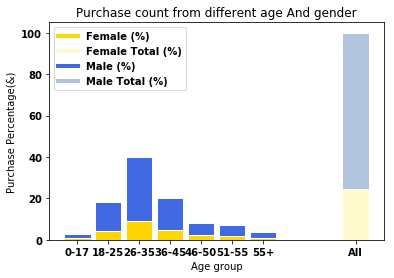

In [39]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars_male = age_gender_num_crosstab.iloc[0].values
bars_female = age_gender_num_crosstab.iloc[1].values
bars_tot = age_gender_num_crosstab.iloc[2].values
 
# The position of the bars on the x-axis
num_category = len(age_gender_crosstab.iloc[0].index)
r = [x*2 for x in range(num_category-1)] + [2*(num_category +1)]

# Names of group and bar width
names = age_gender_crosstab.iloc[0].index
barWidth = 1.7
 
# Create brown bars
plt.bar(r, bars_male, 
        color=['gold']*(num_category-1) + ['lemonchiffon'], 
        edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars_female, bottom=bars_male, 
        color=['royalblue']*(num_category-1) + ['lightsteelblue'], 
        edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Age group")
plt.ylabel("Purchase Percentage(&)")
plt.title("Purchase count from different age And gender")

#Custom legend

legend_elements = [Line2D([0], [0], color='gold', lw=4, label='Female (%)'),
                   Line2D([0], [0], color='lemonchiffon', lw=4, label='Female Total (%)'),
                   Line2D([0], [0], color='royalblue', lw=4, label='Male (%)'),
                   Line2D([0], [0], color='lightsteelblue', lw=4, label='Male Total (%)')]

plt.legend(handles=legend_elements, loc='upper left')

# Show graphic
plt.savefig('sales_age_gender_count.png')
plt.show()

The amount and the purchase total distributed fairly close.

In [40]:
## occupation 

In [41]:
occup_gender_crosstab = pd.crosstab(wdata.Gender, wdata.Occupation, values = wdata.Purchase, aggfunc= np.sum, margins = True ).apply(lambda x: x.fillna(0)*100 / wdata.Purchase.sum())

In [42]:
occup_gender_crosstab

Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,3.134530,2.974460,1.419618,1.413032,2.977946,0.383950,1.456350,1.776774,0.066803,0.986231,...,0.624675,0.250773,1.139971,0.435502,0.718080,0.718162,0.043533,0.333692,1.441988,23.210462
M,9.337693,5.287402,3.229462,1.784239,10.126356,1.858632,2.231931,9.170198,0.224061,0.082380,...,5.367592,1.166933,3.953923,1.887091,3.954256,6.999374,1.157218,1.123469,4.382968,76.789538
All,12.472223,8.261862,4.649080,3.197271,13.104302,2.242583,3.688281,10.946972,0.290864,1.068610,...,5.992267,1.417705,5.093895,2.322593,4.672336,7.717536,1.200751,1.457161,5.824956,100.000000


In [43]:
4225 / (4225+1666)

0.7171957222882362

In [44]:
occup_gender_crosstab.iloc[0,:-1]

Occupation
0     3.134530
1     2.974460
2     1.419618
3     1.413032
4     2.977946
5     0.383950
6     1.456350
7     1.776774
8     0.066803
9     0.986231
10    0.647606
11    0.266787
12    0.624675
13    0.250773
14    1.139971
15    0.435502
16    0.718080
17    0.718162
18    0.043533
19    0.333692
20    1.441988
Name: F, dtype: float64

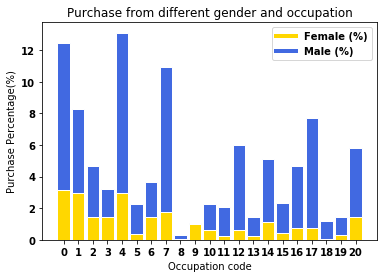

In [45]:
# y-axis in bold
rc('font', weight='bold')
 
# Values of each group
bars_male = occup_gender_crosstab.iloc[0,:-1].values
bars_female = occup_gender_crosstab.iloc[1,:-1].values
bars_tot = occup_gender_crosstab.iloc[2,:-1].values
 
# The position of the bars on the x-axis
num_category = len(occup_gender_crosstab.iloc[0,:-1].index)
r = [x*2 for x in range(num_category)]

# Names of group and bar width
names = occup_gender_crosstab.iloc[0].index
barWidth = 1.7
 
# Create brown bars
plt.bar(r, bars_male, 
        color=['gold']*(num_category), 
        edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, bars_female, bottom=bars_male, 
        color=['royalblue']*(num_category), 
        edgecolor='white', width=barWidth)

# Custom X axis
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Occupation code")
plt.ylabel("Purchase Percentage(%)")
plt.title("Purchase from different gender and occupation")

#Custom legend

legend_elements = [Line2D([0], [0], color='gold', lw=4, label='Female (%)'),
                   Line2D([0], [0], color='royalblue', lw=4, label='Male (%)')]

plt.legend(handles=legend_elements, loc='upper right')

# Show graphic
plt.savefig('sales_occupation.png')
plt.show()

In [46]:
occup_gender_count_crosstab = pd.crosstab(wdata.Gender, wdata.Occupation, margins = True) * 100 / wdata.shape[0]

In [47]:
occup_gender_count_crosstab

Occupation,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,All
Gender,,,,,,,,,,,,,,,,,,,,,
F,3.284739,3.242512,1.562939,1.444816,3.225584,0.401803,1.482764,1.805695,0.066409,1.061615,...,0.630049,0.268799,1.231638,0.428218,0.743335,0.696086,0.040180,0.367203,1.608700,24.591268
M,9.386934,5.309007,3.244744,1.785605,9.956155,1.827645,2.204521,8.947369,0.217085,0.082965,...,5.029233,1.135279,3.737325,1.769049,3.868097,6.575430,1.173599,1.186435,4.513214,75.408732
All,12.671673,8.551519,4.807683,3.230421,13.181740,2.229448,3.687286,10.753064,0.283494,1.144580,...,5.659282,1.404078,4.968963,2.197267,4.611432,7.271516,1.213780,1.553638,6.121914,100.000000


#### Question 3: Is there any evidence to suggest that there exist geographical differences for total sales(purchase)

In [48]:
wdata[['City_Category','Purchase']].groupby(['City_Category']).agg({'Purchase':'sum'})

,Purchase
City_Category,
A,1295668797
B,2083431612
C,1638567969


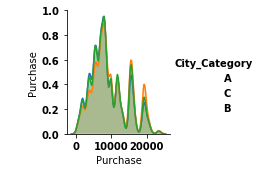

In [49]:
sns.pairplot(wdata[['City_Category','Purchase']], hue = "City_Category")

In [50]:
city_gender_crosstab = pd.crosstab(wdata.Gender, wdata.City_Category, values = wdata.Purchase, aggfunc= np.sum, margins = True ).apply(lambda x: x.fillna(0)*100 / wdata.Purchase.sum())

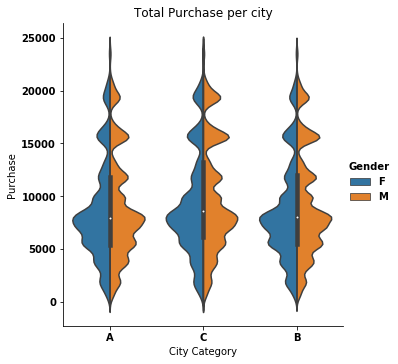

In [51]:
sns.catplot(x="City_Category", y="Purchase", hue="Gender",
            kind="violin", split=True, data=wdata);
plt.title('Total Purchase per city')
plt.xlabel('City Category')
plt.savefig('sales_city.png')

In [52]:
wdata_sumtbl = \
wdata.groupby('User_ID')\
.agg({'Purchase':['count','sum','mean'], 
      'Gender':'max', 
      'City_Category' : 'max', 
      'Occupation': 'max', 
      'Age' : 'max', 
      'Stay_In_Current_City_Years':'max', 
      'Marital_Status' : 'max'})

In [53]:
most_freq_category = wdata[['User_ID', 'Product_Category_1']].groupby(['User_ID']).apply(pd.DataFrame.mode).reset_index(drop=True).dropna().iloc[:,1]

In [54]:
wdata_sumtbl['Most_freq'] = most_freq_category.values

In [55]:
wdata_sumtbl.head()

Purchase                       Gender City_Category Occupation    Age  \
           count     sum          mean    max           max        max    max   
User_ID                                                                         
1000001       34  333481   9808.264706      F             A         10   0-17   
1000002       76  810353  10662.539474      M             C         16    55+   
1000003       29  341635  11780.517241      M             A         15  26-35   
1000004       13  205987  15845.153846      M             B          7  46-50   
1000005      106  821001   7745.292453      M             A         20  26-35   

        Stay_In_Current_City_Years Marital_Status Most_freq  
                               max            max            
User_ID                                                      
1000001                          2              0         3  
1000002                         4+              0         1  
1000003                          3              0         1  
1000004                          2              1         1  
1000005                          1              1         8

In [56]:
wdata_sumtbl.columns = ['Purchase_count','Purchase_sum','Purchase_mean','Gender','City_Category','Occupation','Age',
                        'Stay_In_Current_City_Years','Marital_Status','Most_Freq']

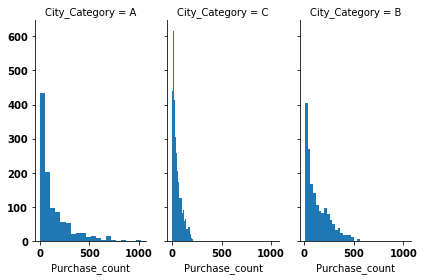

In [57]:
g = sns.FacetGrid(wdata_sumtbl, col="City_Category", height=4, aspect=.5)
g = g.map(plt.hist, "Purchase_count",bins=20)

In [58]:
wdata_sumtbl['Purchase_count_cat'] = wdata_sumtbl.Purchase_count // 50

In [59]:
obs = pd.crosstab(wdata_sumtbl.Purchase_count_cat, wdata_sumtbl.City_Category)

In [60]:
obs.transpose()

Purchase_count_cat,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
City_Category,,,,,,,,,,,,,,,,,,,,
A,392,226,98,82,60,57,21,24,18,19,10,11,4,11,5,2,1,2,1,1
B,568,329,204,153,169,102,70,42,36,25,7,2,0,0,0,0,0,0,0,0
C,1875,806,316,136,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
import scipy.stats
chi2, p, dof, ex = scipy.stats.chi2_contingency(obs, correction=True)

In [62]:
print((chi2, p, dof))

(1215.5548276546062, 2.289380486539693e-230, 38)


Text(0.5,1,'Purchase count')

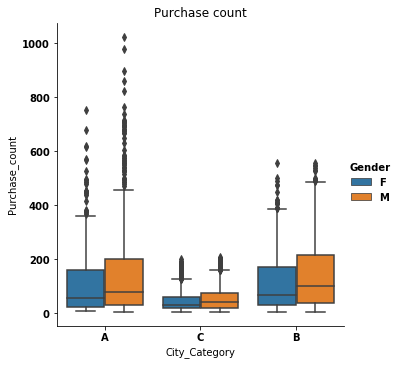

In [63]:
sns.catplot(x="City_Category", y="Purchase_count", hue="Gender",
             kind = 'box', data=wdata_sumtbl)
plt.title('Purchase count')

Text(0.5,1,'Purchase sum')

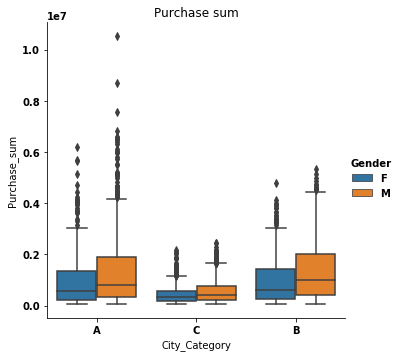

In [64]:
sns.catplot(x="City_Category", y="Purchase_sum", hue="Gender",
            kind = 'box', data=wdata_sumtbl)
plt.title('Purchase sum')

from the above plot, we can see that the population is not normally distribued, which resulted that we can not use one-way ANOVA since it violated the normality assumption and consequentially the p-value will be incorrect. However, one noticable feature is that the distribution for both men and women are fairly similar to each other aside from tail behavior. 

#### Question 4: What is the expected amount spent from a 20 years old, married women who have lived in the city C for more than 10 consecutive years?  

In [65]:
import statsmodels.api as sm
import random

In [66]:
random.seed(0)
index = [x for x in range(len(wdata_sumtbl.index))]
#train_index = random.sample(index)
train_index = random.sample(index, round(len(wdata_sumtbl.index) * 0.8))
test_index = list(set(index) - set(train_index))

In [67]:
y = wdata_sumtbl.Purchase_sum.values

In [68]:
y_log = np.log(wdata_sumtbl.Purchase_sum.values)

In [69]:
#[str(x)[0] for x in wdata_sumtbl.Stay_In_Current_City_Years]

In [70]:
X = pd.DataFrame(data = {'Age':[str(x)[0] for x in wdata_sumtbl.Age],
                        'Gender' : wdata_sumtbl.Gender.apply(lambda x: 1 if x=='M' else 0).values,
                        'Stay':[str(x)[0] for x in wdata_sumtbl.Stay_In_Current_City_Years],
                        'Marital_Status': wdata_sumtbl.Marital_Status,
                        'Most_Freq' : wdata_sumtbl.Most_Freq})

In [71]:
model = sm.OLS(y[train_index].astype(float), X.iloc[train_index,].astype(float)).fit()

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     688.6
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:06:49   Log-Likelihood:                -71625.
No. Observations:                4713   AIC:                         1.433e+05
Df Residuals:                    4708   BIC:                         1.433e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age             5.096e+04   9925.666      5.134      0.000    3.15e+04    7.04e+04
Gender          5.067e+05   2.67e+04     18.993      0.000    4.54e+05    5.59e+05
Stay            8.349e+04   9862.326      8.465      0.000    6.42e+04    1.03e+05
Marital_Status  4.086e+04   3.02e+04      1.353      0.176   -1.83e+04       1e+05
Most_Freq       2.624e+04   4413.954      5.944      0.000    1.76e+04    3.49e+04
==============================================================================
Omnibus:                     2287.002   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16170.429
Skew:                           2.216   Prob(JB):                         0.00
Kurtosis:                      10.918   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Residual vs Sequence plot')

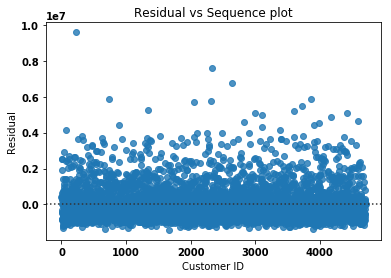

In [73]:
sns.residplot([x for x in range(X.iloc[train_index,].shape[0])],model.resid)
plt.xlabel('Customer ID')
plt.ylabel('Residual')
plt.title('Residual vs Sequence plot')

Text(0.5,1,'Residual vs Fitted Value plot')

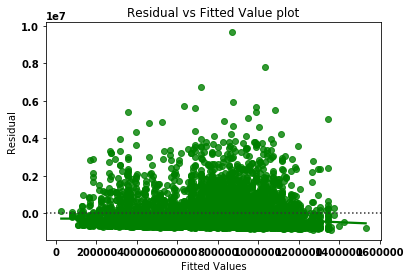

In [74]:
sns.residplot(model.fittedvalues, model.resid, lowess=True, color="g")
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Residual vs Fitted Value plot')

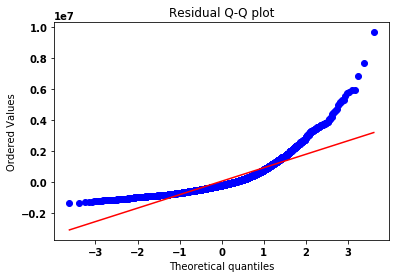

In [75]:
import pylab
scipy.stats.probplot(model.resid, dist="norm", plot=pylab)
plt.title('Residual Q-Q plot')
plt.savefig('model_qqplot.png')
pylab.show()

In [76]:
## log_y

In [77]:
model_log = sm.OLS(y_log[train_index,].astype(float), X.iloc[train_index,].astype(float)).fit()

In [78]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9403.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:06:49   Log-Likelihood:                -13207.
No. Observations:                4713   AIC:                         2.642e+04
Df Residuals:                    4708   BIC:                         2.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                1.2413      0.041     30.215      0.000       1.161       1.322
Gender             5.0020      0.110     45.298      0.000       4.785       5.218
Stay               1.3056      0.041     31.983      0.000       1.226       1.386
Marital_Status     0.6618      0.125      5.295      0.000       0.417       0.907
Most_Freq          0.5995      0.018     32.813      0.000       0.564       0.635
==============================================================================
Omnibus:                       14.542   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.545
Skew:                          -0.127   Prob(JB):                     0.000694
Kurtosis:                       2.902   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

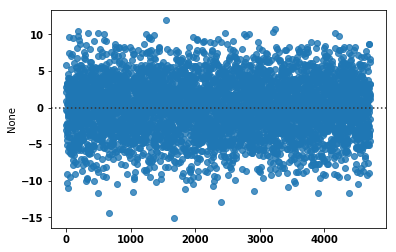

In [79]:
sns.residplot([x for x in range(X.iloc[train_index,].shape[0])],model_log.resid)

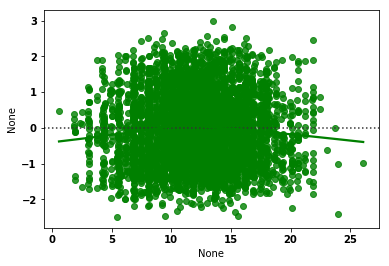

In [80]:
sns.residplot(model_log.fittedvalues, model_log.resid, lowess=True, color="g")
plt.savefig('model_log_res.png')

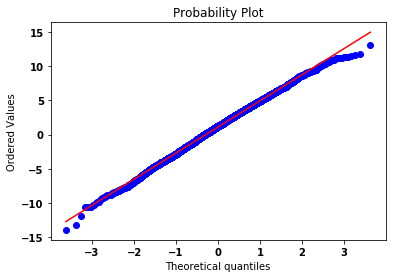

In [81]:
scipy.stats.probplot(model_log.resid, dist="norm", plot=pylab)
plt.savefig('model_log_qqplot.png')
pylab.show()

In [82]:
## predictions

In [83]:
X.iloc[test_index,]

,Age,Gender,Stay,Marital_Status,Most_Freq
User_ID,,,,,
1002107,2,1,3,1,8
1002109,2,1,2,0,5
1002110,5,1,3,0,5
1004210,2,1,0,0,1
1000008,2,1,4,1,8
1004213,3,1,4,0,1
1000011,2,0,1,0,5
1002119,3,1,3,0,1
1002122,3,1,4,1,5


In [84]:
ynews = model_log.predict(X.iloc[test_index,].astype('float'))

In [85]:
result = pd.DataFrame(X.iloc[test_index,])

In [86]:
result['ynew_log'] = ynews
result['ynew'] = result.ynew_log.apply(lambda x: np.exp(x)).astype('int')

In [87]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9403.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        13:06:50   Log-Likelihood:                -13207.
No. Observations:                4713   AIC:                         2.642e+04
Df Residuals:                    4708   BIC:                         2.646e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                1.2413      0.041     30.215      0.000       1.161       1.322
Gender             5.0020      0.110     45.298      0.000       4.785       5.218
Stay               1.3056      0.041     31.983      0.000       1.226       1.386
Marital_Status     0.6618      0.125      5.295      0.000       0.417       0.907
Most_Freq          0.5995      0.018     32.813      0.000       0.564       0.635
==============================================================================
Omnibus:                       14.542   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.545
Skew:                          -0.127   Prob(JB):                     0.000694
Kurtosis:                       2.902   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
result['y_ori'] = y[test_index]
result['y_ori_log'] = np.log(result.y_ori)
result[['ynew_log','ynew','y_ori','y_ori_log']]

,ynew_log,ynew,y_ori,y_ori_log
User_ID,,,,
1002107,16.858932,20976882,152258,11.933332
1002109,13.093110,485585,3069936,14.937167
1002110,18.122581,74222711,1127264,13.935304
1004210,8.084039,3242,766243,13.549255
1000008,18.164505,77400625,796545,13.588039
1004213,14.547634,2079491,2898136,14.879578
1000011,6.785575,884,556902,13.230145
1002119,13.242060,563577,1103741,13.914216
1002122,17.607363,44338437,1025231,13.840429


In [89]:
np.mean((result.ynew - result.y_ori)**2)

-9443063764362274.0

In [90]:
wdata_sumtbl.iloc[test_index,]

,Purchase_count,Purchase_sum,Purchase_mean,Gender,City_Category,Occupation,Age,Stay_In_Current_City_Years,Marital_Status,Most_Freq,Purchase_count_cat
User_ID,,,,,,,,,,,
1002107,17,152258,8956.352941,M,A,1,26-35,3,1,8,0
1002109,412,3069936,7451.300971,M,B,16,26-35,2,0,5,8
1002110,124,1127264,9090.838710,M,C,11,51-55,3,0,5,2
1004210,63,766243,12162.587302,M,C,17,26-35,0,0,1,1
1000008,76,796545,10480.855263,M,C,12,26-35,4+,1,8,1
1004213,217,2898136,13355.465438,M,B,7,36-45,4+,0,1,4
1000011,69,556902,8071.043478,F,C,1,26-35,1,0,5,1
1002119,106,1103741,10412.650943,M,B,4,36-45,3,0,1,2
1002122,114,1025231,8993.254386,M,C,12,36-45,4+,1,5,2
